In [124]:
import tensorflow as tf
import numpy as np

Load data:

In [125]:
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Traning params:

In [126]:
learningRate = 0.01
batchSize = 100
train_epoch = 35

Task params:

In [127]:
nInput = 784
nClasses = 10
dropout = 0.75

Variables:

In [128]:
X = tf.placeholder(tf.float32, [None, nInput])
Y = tf.placeholder(tf.float32, [None, nClasses])
keep_prob = tf.placeholder(tf.types.float32)

In [129]:
weights = {
    'w1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'fc' : tf.Variable(tf.random_normal([14*14*32, 1024])),
    'out' : tf.Variable(tf.random_normal([1024, nClasses]))
}

Build convolutional neural network:

In [130]:
reshapedX = tf.reshape(X, shape=[-1, 28, 28, 1])
conv1 = tf.nn.relu(tf.nn.conv2d(reshapedX, weights['w1'], strides=[1, 1, 1, 1], padding='SAME'))
conv1 = tf.nn.max_pool(conv1 , ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
conv1 = tf.nn.dropout(conv1, keep_prob)

dense1 = tf.reshape(conv1, [-1, weights['fc'].get_shape().as_list()[0]]) 

dense1 = tf.nn.relu(tf.matmul(dense1, weights['fc']))
dense1 = tf.nn.dropout(dense1, keep_prob)
pred = tf.matmul(dense1, weights['out'])

Determine cost function:

In [131]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(cost)

Measure model accuracy:

In [132]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Initialize variables:

In [133]:
init = tf.initialize_all_variables()
saver = tf.train.Saver()

Train and save model:

In [134]:
display_step = 1

with tf.Session() as sess:
    sess.run(init)
    step = 1
    
    while step < train_epoch:
        batch_xs, batch_ys = mnist.train.next_batch(batchSize)
        
        sess.run(optimizer, feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: dropout})
        
        if step % display_step == 0:
            acc = sess.run(accuracy, feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 1.})
            loss = sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 1.})
            print "Iter " + str(step) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished!"
    print "Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images[:256], 
                                                             Y: mnist.test.labels[:256], 
                                                             keep_prob: 1.})
    
    save_path = saver.save(sess, "/tmp/model.ckpt")

Iter 1, Minibatch Loss= 2013.264404, Training Accuracy= 0.32000
Iter 2, Minibatch Loss= 1899.021118, Training Accuracy= 0.45000
Iter 3, Minibatch Loss= 1557.091309, Training Accuracy= 0.56000
Iter 4, Minibatch Loss= 984.706116, Training Accuracy= 0.60000
Iter 5, Minibatch Loss= 1039.350464, Training Accuracy= 0.64000
Iter 6, Minibatch Loss= 546.490967, Training Accuracy= 0.69000
Iter 7, Minibatch Loss= 379.783478, Training Accuracy= 0.78000
Iter 8, Minibatch Loss= 548.776001, Training Accuracy= 0.69000
Iter 9, Minibatch Loss= 484.658997, Training Accuracy= 0.74000
Iter 10, Minibatch Loss= 278.101471, Training Accuracy= 0.81000
Iter 11, Minibatch Loss= 181.372818, Training Accuracy= 0.89000
Iter 12, Minibatch Loss= 191.612518, Training Accuracy= 0.84000
Iter 13, Minibatch Loss= 532.668213, Training Accuracy= 0.79000
Iter 14, Minibatch Loss= 264.792999, Training Accuracy= 0.83000
Iter 15, Minibatch Loss= 475.156128, Training Accuracy= 0.84000
Iter 16, Minibatch Loss= 177.035416, Training

Manual test:

[1]


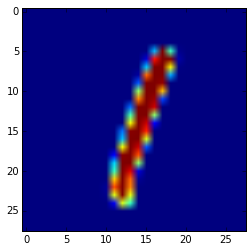

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

img = mnist.test.images[5]
plt.imshow(img.reshape(28, 28))

with tf.Session() as sess:
    saver.restore(sess, "/tmp/model.ckpt")
    print sess.run(tf.argmax(pred, 1), feed_dict = {X: img.reshape(1, 784), keep_prob: 1.})